# EDA King County - Work edition

*Clear the namespace.*

In [1]:
reset -fs

*Import required libraries.*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import statsmodels.formula.api as smf
import warnings

%matplotlib inline

*Load the dataset.*

In [3]:
kingcnt = pd.read_csv("data/King_County_House_prices_dataset.csv")

In [4]:
df_kingcnt = DataFrame(kingcnt,columns=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']) 

*Check whether dataset is loaded by checking the number of rows and columns*

In [5]:
df_kingcnt.shape

(21597, 21)

## Understand

### Stakeholder briefing

Question from stakeholder:
What compromises do I need to make if I want to buy a house with mid to mid-high price?

Potential compromises defined by the stakeholder are:
* waterfront
* neighbourhood
* renovation
* condition

What impact do these compromises have on the price?

Other wishes of the stakeholder are:
* 2 bedrooms (one child)
* 2 bathrooms (own bathroom, because afraid of germs)
* no outskirts
* no crowded neighbourhood

## Assume

More expensive houses:
1. have a waterfront view
2. are in a good neighbourhood, meaning that:

     a. the 15 nearest houses are large
     
     b. the 15 nearest houses have large plots
     
3. have been renovated
4. are in a good condition

## Explore

*Check the columns that can be used for our analyses.*

In [6]:
df_kingcnt.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

The column name and description of the variables included in the EDA are reported the table below.

column name | description
------------|-------------
price | price of the house
waterfront | house has a view to the waterfront
sqft_living15 | space of the 15 closest neighboring houses in square feet
sqft_lot15 | space of the 15 closest neighboring plots in square feet
yr_renovated | most recent year in which the house was renovated
condition | overall condition of the house

*Check the info of these columns.*

In [7]:
df_kingcnt[['price', 'waterfront', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'condition']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   waterfront     19221 non-null  float64
 2   sqft_living15  21597 non-null  int64  
 3   sqft_lot15     21597 non-null  int64  
 4   yr_renovated   17755 non-null  float64
 5   condition      21597 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1012.5 KB


The data frame has 21597 rows, so the columns waterfront and yr_renovated to have some non-null values. We need to take care of these values when cleaning the data.

*Check what is going on with these columns*

*Waterfront*

In [8]:
df_kingcnt.waterfront.unique()

array([nan,  0.,  1.])

In [9]:
np.isnan(df_kingcnt.waterfront.values).sum()

2376

There are 2376 instances of nan in the column waterfront.

*Renovated*

In [10]:
df_kingcnt.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [11]:
np.isnan(df_kingcnt.yr_renovated.values).sum()

3842

In [12]:
yr0 = df_kingcnt.query('yr_renovated == 0')
len(yr0.yr_renovated)

17011

There are 3842 instances of nan and 17011 instances of 0 in the column yr_renovated. Houses with 0 probably have not been renovated.

*Check the summary of the data of the columns of interest.*

In [13]:
df_kingcnt[['price', 'waterfront', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'condition']].describe()

,price,waterfront,sqft_living15,sqft_lot15,yr_renovated,condition
count,2.159700e+04,19221.000000,21597.000000,21597.000000,17755.000000,21597.000000
mean,5.402966e+05,0.007596,1986.620318,12758.283512,83.636778,3.409825
std,3.673681e+05,0.086825,685.230472,27274.441950,399.946414,0.650546
min,7.800000e+04,0.000000,399.000000,651.000000,0.000000,1.000000
25%,3.220000e+05,0.000000,1490.000000,5100.000000,0.000000,3.000000
50%,4.500000e+05,0.000000,1840.000000,7620.000000,0.000000,3.000000
75%,6.450000e+05,0.000000,2360.000000,10083.000000,0.000000,4.000000
max,7.700000e+06,1.000000,6210.000000,871200.000000,2015.000000,5.000000


*Plot the columns of interest.*

### Price

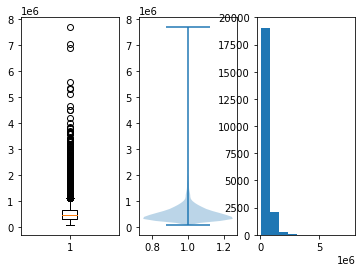

In [14]:
fig, ax = plt.subplots(1,3)

ax[0].boxplot(df_kingcnt.price);
ax[1].violinplot(df_kingcnt.price);
ax[2].hist(df_kingcnt.price);

The price data is not normally distributed, which is a problem for the regression analysis. Hence, we add a column in which we apply a logarithmic transformation of the price.

In [15]:
df_kingcnt['price_log'] = np.log(df_kingcnt['price'])

In [16]:
df_kingcnt[['price','price_log']].head()

,price,price_log
0,221900.0,12.309982
1,538000.0,13.195614
2,180000.0,12.100712
3,604000.0,13.311329
4,510000.0,13.142166


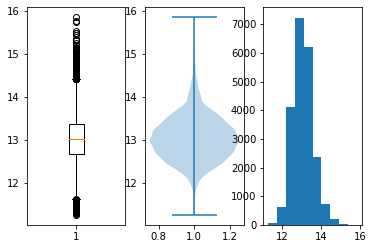

In [17]:
fig, ax = plt.subplots(1,3)

ax[0].boxplot(df_kingcnt.price_log);
ax[1].violinplot(df_kingcnt.price_log);
ax[2].hist(df_kingcnt.price_log);

### Waterfront view

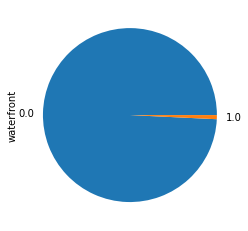

In [18]:
df_kingcnt.waterfront.value_counts().plot(kind = "pie");

There are very few waterfront houses. Are waterfront houses more expensive?

In [19]:
df_kingcnt.groupby('waterfront')['price_log'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0.0,19075.0,13.041237,0.517271,11.264464,12.676076,13.017003,13.367034,15.856731
1.0,146.0,14.137806,0.686429,12.560244,13.626151,14.226830,14.640693,15.769956


Based on the distribution, they are.

*Visualize this with a violin plot.*

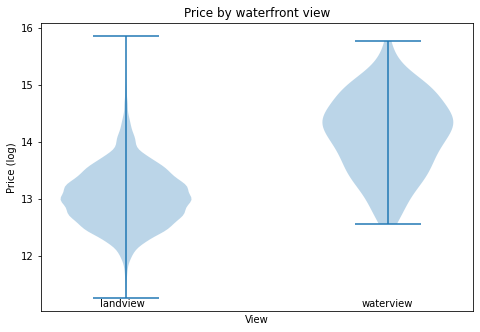

In [20]:
landview = df_kingcnt.query('waterfront == 0')['price_log']
waterview = df_kingcnt.query('waterfront == 1')['price_log']

waterfront_price = [landview, waterview]

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

bp = ax.violinplot(waterfront_price)
bp = ax.set_title("Price by waterfront view")
bp = ax.set_xlabel("View")
bp = ax.set_ylabel("Price (log)")
bp = ax.text(0.9,11.1, 'landview')
bp = ax.text(1.9,11.1, 'waterview')

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.show()

Waterfront houses seem to be more expensive.

### Neighborhood

#### Size of neighboring houses

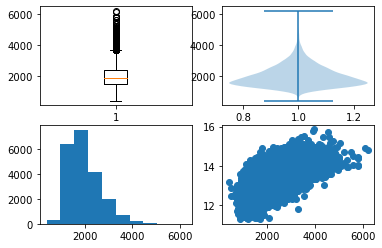

In [21]:
fig, ax = plt.subplots(2,2)

ax[0,0].boxplot(df_kingcnt.sqft_living15);
ax[0,1].violinplot(df_kingcnt.sqft_living15);
ax[1,0].hist(df_kingcnt.sqft_living15);
ax[1,1].scatter(x = df_kingcnt.sqft_living15, y = df_kingcnt.price_log);

The distribution of the size of neighboring houses is acceptable. Houses with larger houses in the neighborhood seem more expensive based on the scatterplot.

#### Land plot of neighboring houses

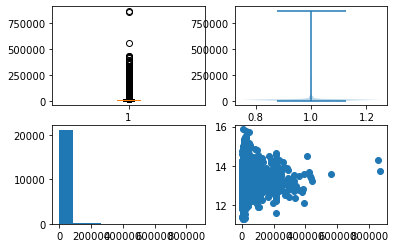

In [22]:
fig, ax = plt.subplots(2,2)

ax[0,0].boxplot(df_kingcnt.sqft_lot15);
ax[0,1].violinplot(df_kingcnt.sqft_lot15);
ax[1,0].hist(df_kingcnt.sqft_lot15);
ax[1,1].scatter(x = df_kingcnt.sqft_lot15, y = df_kingcnt.price_log);

The land plot of neighboring houses is very skewed. A column with the log transformed land plot will be added to the dataframe.

In [23]:
df_kingcnt['lot15_log'] = np.log(df_kingcnt['sqft_lot15'])

In [24]:
df_kingcnt[['sqft_lot15', 'lot15_log']].head()

,sqft_lot15,lot15_log
0,5650,8.639411
1,7639,8.941022
2,8062,8.994917
3,5000,8.517193
4,7503,8.923058


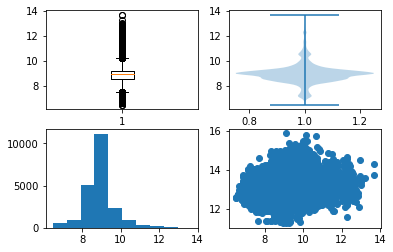

In [25]:
fig, ax = plt.subplots(2,2)

ax[0,0].boxplot(df_kingcnt.lot15_log);
ax[0,1].violinplot(df_kingcnt.lot15_log);
ax[1,0].hist(df_kingcnt.lot15_log);
ax[1,1].scatter(x = df_kingcnt.lot15_log, y = df_kingcnt.price_log);

Now the data is less skewed. Based on the scatter plot, there does not seem to be a relationship between the size of the neighboring plots and the price.

### Renovated

*Code the year of renovation as a boolean: true if it has been renovated, false if not.*

In [26]:
df_kingcnt['renovated'] = df_kingcnt['yr_renovated'] > 0

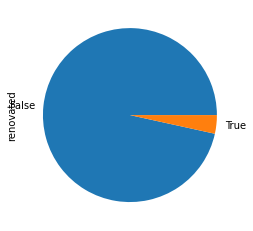

In [27]:
df_kingcnt.renovated.value_counts().plot(kind = "pie");

There are very few renovated houses. Are renovated houses more expensive?

In [28]:
df_kingcnt.groupby('renovated')['price_log'].describe()

,count,mean,std,min,25%,50%,75%,max
renovated,,,,,,,,
False,20853.0,13.037616,0.519781,11.264464,12.676076,13.014778,13.36138,15.745582
True,744.0,13.345169,0.620570,11.608236,12.929385,13.317102,13.71015,15.856731


Based on the distribution they are a bit more expensive. This will be checked with a violin plot.

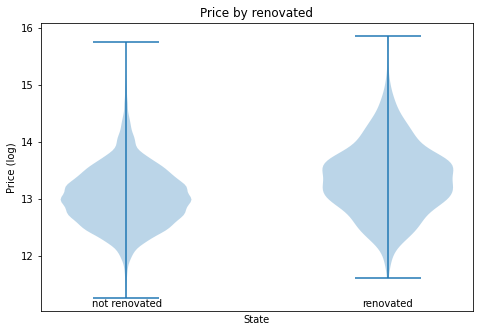

In [29]:
renovated_no = df_kingcnt.query('renovated == False')['price_log']
renovated_yes = df_kingcnt.query('renovated == True')['price_log']

renovated_price = [renovated_no, renovated_yes]

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

bp = ax.violinplot(renovated_price)
bp = ax.text(0.87,11.1, 'not renovated')
bp = ax.text(1.9,11.1, 'renovated')
bp = ax.set_title("Price by renovated")
bp = ax.set_xlabel("State")
bp = ax.set_ylabel("Price (log)")

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.show()

Renovated houses seem more expensive than not renovated houses.

### Condition

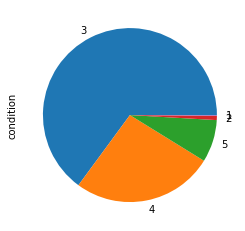

In [30]:
df_kingcnt.condition.value_counts().plot(kind = "pie");

Most houses have condition 3. Are houses in conditions 4 and 5 more expensive than those in condition 3?

In [31]:
df_kingcnt.groupby('condition')['price_log'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,29.0,12.512814,0.675849,11.264464,12.154779,12.506177,12.977338,14.220976
2,170.0,12.539268,0.540546,11.289782,12.150822,12.538967,12.896960,14.755518
3,14020.0,13.056700,0.516417,11.314475,12.706469,13.017558,13.369223,15.769956
4,5677.0,13.012227,0.526025,11.396392,12.628067,12.994530,13.345507,15.856731
5,1701.0,13.158327,0.560970,11.608236,12.765688,13.173056,13.493927,15.110238


Based on the distribution, condition does not seem to have a linear relationship with the price. Check this in the violin plot.

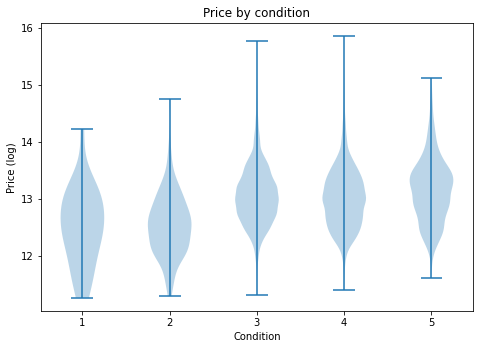

In [32]:
condition_1 = df_kingcnt.query('condition == 1')['price_log']
condition_2 = df_kingcnt.query('condition == 2')['price_log']
condition_3 = df_kingcnt.query('condition == 3')['price_log']
condition_4 = df_kingcnt.query('condition == 4')['price_log']
condition_5 = df_kingcnt.query('condition == 5')['price_log']

condition_price = [condition_1, condition_2, condition_3, condition_4, condition_5]

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
bp = ax.set_title("Price by condition")
bp = ax.set_xlabel("Condition")
bp = ax.set_ylabel("Price (log)")
bp = ax.violinplot(condition_price)

plt.show()

There only seems to be difference in price between the first two conditions, in which there is hardly any data, and the rest.

## Clean

Waterfront and year of renovation had missing values. The year of renovation does not require further action, because values above 0 were coded as renovated and the rest as False, as shown below.

In [33]:
df_kingcnt[pd.isnull(df_kingcnt['yr_renovated'])]['renovated'].head()

2     False
12    False
23    False
26    False
28    False
Name: renovated, dtype: bool

*The missing values in waterfront are replaced with 0.*

In [34]:
df_kingcnt.fillna({'waterfront':0}, inplace=True)

## Relate

### Waterfront
* The standard deviations of the log transformed prices of the houses with and without waterfront are comparable.
* Houses with waterfront are significantly more expensive than houses without waterfront
* The impact of waterfront on the price is .0291.

In [35]:
#standard deviations
df_kingcnt.groupby('waterfront')['price_log'].std()

waterfront
0.0    0.517519
1.0    0.686429
Name: price_log, dtype: float64

In [36]:
#anova
model_water = smf.ols('price_log~waterfront', data=df_kingcnt).fit()
print(sms.stats.anova_lm(model_water, typ=2))

                 sum_sq       df           F         PR(>F)
waterfront   174.513643      1.0  648.287799  6.303414e-141
Residual    5813.193039  21595.0         NaN            NaN


In [37]:
#R-squared
rs = smf.ols(formula='price_log~waterfront', data=df_kingcnt).fit().rsquared
f'{rs:.3}'

'0.0291'

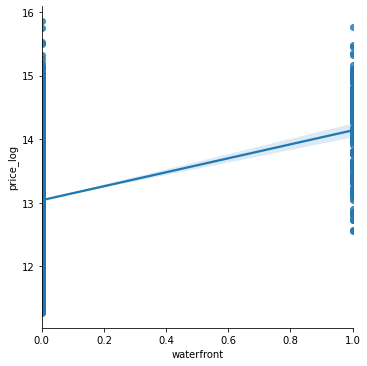

In [38]:
warnings.filterwarnings('ignore')
sns.lmplot('waterfront', 'price_log',data=df_kingcnt);

### Neighbourhood

#### Size of surrounding houses
* The impact of the size of the surrounding houses is .384.

In [39]:
#R-squared
rs = smf.ols(formula='price_log~sqft_living15', data=df_kingcnt).fit().rsquared
f'{rs:.3}'

'0.384'

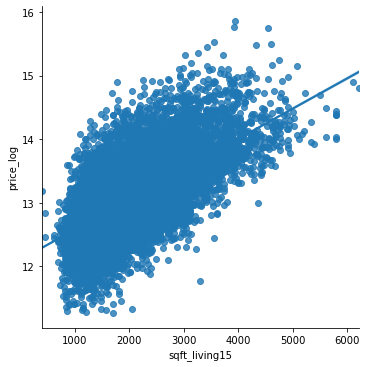

In [40]:
sns.lmplot('sqft_living15', 'price_log',data=df_kingcnt);

#### Size of the surrounding plots
* The impact of the size of the surrounding plots is .0153

In [41]:
#R-squared
rs = smf.ols(formula='price_log~lot15_log', data=df_kingcnt).fit().rsquared
f'{rs:.3}'

'0.0153'

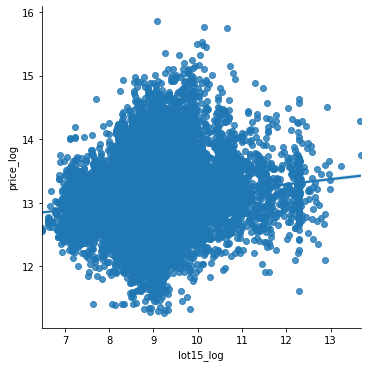

In [42]:
sns.lmplot('lot15_log', 'price_log',data=df_kingcnt);

### Renovation
* The standard deviations of the log transformed prices of the renovated houses are comparable to those that were not renovated.
* rRenovated houses are significantly more expensive than not renovated ones
* The impact of renovation on the price is .0103.

In [43]:
#standard deviations
df_kingcnt.groupby('renovated')['price_log'].std()

renovated
False    0.519781
True     0.620570
Name: price_log, dtype: float64

In [44]:
#anova
model_renovated = smf.ols('price_log~renovated', data=df_kingcnt).fit()
print(sms.stats.anova_lm(model_renovated, typ=2))

                sum_sq       df           F        PR(>F)
renovated    67.949685      1.0  247.877312  1.535541e-55
Residual   5919.756997  21595.0         NaN           NaN


In [45]:
#R-squared
rs = smf.ols(formula='price_log~renovated', data=df_kingcnt).fit().rsquared
f'{rs:.3}'

'0.0113'

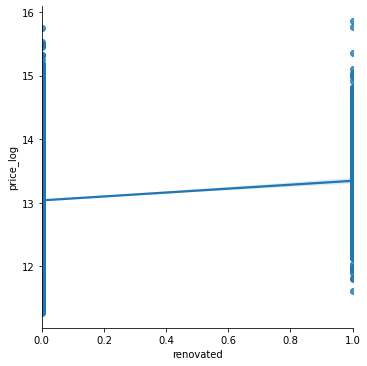

In [46]:
sns.lmplot('renovated', 'price_log',data=df_kingcnt);

### Condition
* The standard deviations of the log transformed prices of houses in each condition are comparable.
* Houses with better conditions are significantly more expensive than those in worse conditions.
* The impact of condition on the price is .00151.

In [47]:
#standard deviation
df_kingcnt.groupby('condition')['price_log'].std()

condition
1    0.675849
2    0.540546
3    0.516417
4    0.526025
5    0.560970
Name: price_log, dtype: float64

In [48]:
#anova
model_condition = smf.ols('price_log~condition', data=df_kingcnt).fit()
print(sms.stats.anova_lm(model_condition, typ=2))

                sum_sq       df          F        PR(>F)
condition     9.069161      1.0  32.758053  1.057555e-08
Residual   5978.637522  21595.0        NaN           NaN


In [49]:
#R-squared
rs = smf.ols(formula='price_log~condition', data=df_kingcnt).fit().rsquared
f'{rs:.3}'

'0.00151'

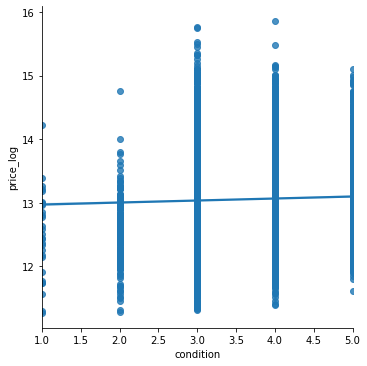

In [50]:
sns.lmplot('condition', 'price_log',data=df_kingcnt);

### Multiple linear regression
R-squared and adjusted R-squared for the full model are .437, so all variables together do not have a large impact on the price.

In [51]:
smf.ols(formula='price_log~waterfront+sqft_living15+lot15_log+renovated+condition', data=df_kingcnt).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     3348.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:15:45   Log-Likelihood:                -10594.
No. Observations:               21597   AIC:                         2.120e+04
Df Residuals:                   21591   BIC:                         2.125e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.5540      0.032    390.213      0.000      12.491      12.617
renovated[T.True]     0.3080      0.015     20.788      0.000       0.279       0.337
waterfront            0.7481      0.033     22.612      0.000       0.683       0.813
sqft_living15         0.0005   4.28e-06    121.590      0.000       0.001       0.001
lot15_log            -0.0984      0.004    -27.291      0.000      -0.105      -0.091
condition             0.0956      0.004     22.793      0.000       0.087       0.104
==============================================================================
Omnibus:                      411.858   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.274
Skew:                           0.245   Prob(JB):                    1.96e-120
Kurtosis:                       3.610   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assume

It was assumed that more expensive houses:
1. have a waterfront view - CORRECT
2. are in a good neighbourhood, meaning that:

     a. the 15 nearest houses are large - CORRECT
     
     b. the 15 nearest houses have large plots - INCORRECT
     
3. have been renovated - CORRECT
4. are in a good condition - CORRECT

However, all these factors individually and in combination do not have a large impact on the price of the house. Does this mean you don't have to compromise?

## Fine tune

Wishes of the stakeholder were:
* 2 bedrooms
* 2 bathrooms
* mid to mid high price
* waterfront if possible

In [52]:
df_kingcnt[['price_log','sqft_living15']].describe()

,price_log,sqft_living15
count,21597.000000,21597.000000
mean,13.048211,1986.620318
std,0.526555,685.230472
min,11.264464,399.000000
25%,12.682307,1490.000000
50%,13.017003,1840.000000
75%,13.377006,2360.000000
max,15.856731,6210.000000


In [53]:
selection = df_kingcnt.query('bedrooms == 2 and bathrooms == 2 and sqft_living15 >= 1840 and price_log > 13.017003 and price_log < 13.377006 and condition > 2')

In [54]:
selection.shape

(21, 24)

In [55]:
from bokeh.plotting import figure, output_file, output_notebook, show  
from bokeh.tile_providers import OSM, get_provider

# file to save the model  
output_file("kcmap.html")  
output_notebook()

# instantiating the figure object  
graph = figure(title = "Map of House Sales in King County", x_axis_type="mercator", y_axis_type="mercator")

#tile provider
tile_provider = get_provider(OSM)
graph.add_tile(tile_provider)

# name of the x-axis  
graph.xaxis.axis_label = "Long"

# name of the y-axis  
graph.yaxis.axis_label = "Lat"

# points to be plotted converted to mercator
k = 6378137
x = selection.long.apply(lambda x: x * (k * np.pi/180.0))
y = selection.lat.apply(lambda x: np.log(np.tan((90 + x) * np.pi/360.0)) * k)
size = 8

# plotting the graph  
graph.scatter(x, y, 
              fill_alpha=0.1,
              size = size)  

# displaying the model  
show(graph)

Loading BokehJS ...

## Explain

Houses with a waterfront view, houses in good neighborhood with larger houses, renovated houses and houses with a good condition are generally more expensive, these characteristics do not have a large impact on the price. The availability of renovated houses with a waterfront has been sparse in the past years. However, 21 houses with 2 bedrooms, 2 bathrooms, surrounded by larger houses in good neighborhoods that have a mid to mid-high price have been available. Ten of those houses are located in less crowded neighborhoods, the other ones are located in the outskirts of the city, as you can see on the map. One of the houses has a water front, but this one is on the outskirts of the city. So, if you want the waterfront house, you have to compromise on living more on the outskirts of the city.